Pricing of an european option using Monte Carlo

In [1]:
%matplotlib inline
import numpy as np 

import matplotlib.pyplot as plt 

def F(t,x,rho,sigma,T,K,n):
    Y = x*np.exp((rho-((sigma**2)/2))*(T-t)+sigma*np.sqrt(T-t)*np.random.normal(0,1,n)) - K
    R = np.exp(-rho*(T-t))*np.where(Y>0,Y,0)
    return np.mean(R)
     
sigma=0.08
rho=0.02
T = 1 
K=100
s0 = 100 
t=0 
n = 10000000 
print(F(t,s0,rho,sigma,T,K,n)) 

4.24714426048245


Princing of an european option using the Black and Scholes formula

In [2]:
import scipy.stats   
def Fl(t,x,rho,sigma,T,K):
    d = (1/(sigma*np.sqrt(T-t)))*np.log(x/K)+(rho/sigma)*np.sqrt(T-t)-(sigma/2)*np.sqrt(T-t) 
    return x*scipy.stats.norm(0, 1).cdf(d+sigma*np.sqrt(T-t))-K*np.exp(-rho*(T-t))*scipy.stats.norm(0, 1).cdf(d)
t=0 
print(Fl(t,s0,rho,sigma,T,K)) 
      

4.247318143599706


Princing of an european option by using the retograde method 

In [3]:
import numpy as np  
m = 10000 
t = 0 
def Fr(t,x,rho,sigma,T,K,m):
    b = (sigma /np.sqrt(m))
    a = -b 
    r = rho / m
    n = round(m*T)- round(m*t) 
    V = np.zeros((n+1,n+1))
    index = np.arange(n+1)
    V[:,n] = K-x*(1+a)**index * (1+b)**(n-index) 
    V[:,n] = np.where(V[:,n]>0,V[:,n],0)
    p  = (b-r) / (b-a) 
    for i in range(n-1,-1,-1): 
        V[0:i+1,i] = (1/(1+r))*((1-p)*V[0:i+1,i+1] + p*V[1:i+2,i+1])
    return float(V[0,0]) + x-K/(1+r)**n
    
print(Fr(t,s0,rho,sigma,T,K,m))



4.247234044321118


Simulation of the price at time t

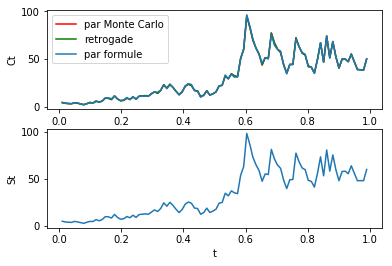

In [5]:
N = 100  
m = 100  
n = 10000 
F = np.vectorize(F) 
t = np.linspace(T/N,T-(T/N),N)
Norm = np.random.normal(0,1,N) 
B = [np.sqrt(T/N)*sum(Norm[:i]) for i in range(N)]
B = np.array(B) 
St = s0*np.exp((rho-((sigma**2)/2))*t+sigma*B)
Ct = F(t,St,rho,sigma,T,K,n)
Clt = [Fl(t[i],St[i],rho,sigma,T,K) for i in range(N)]
Crt = [Fr(float(t[i]),St[i],rho,sigma,T,K,m) for i in range(N)]
F = np.vectorize(F) 
plt.subplot(2, 1, 1)
plt.plot(t,Clt,"r") 
plt.plot(t,Crt,"g") 
plt.plot(t,Ct) 
plt.xlabel("t") 
plt.ylabel("Ct")
plt.legend(('par Monte Carlo','retrogade','par formule'),
           loc='upper left')
plt.subplot(2, 1, 2)
plt.xlabel("t")  
plt.ylabel("St")  
plt.plot(t,St)         

Pricing of an european option by resolving the differentiel equation 

In [6]:

N=100
KI=np.log(2*K) 
T=1 

sigma=0.08 
rho=0.02 
lt= np.linspace(0,T,N) 
dt=T/N
dy= (2*KI/M)*np.linspace(0,M,M)
dx=(2*K/M)
Y= -KI*np.ones((1,M))+dy  


A  = 2*np.eye(M) - np.eye(M, k=1) - np.eye(M, k=-1)  
A[0,0:3]=[-1,2,-1]
A[M-1,M-3:M]=[-1,2,-1]
D=np.eye(M)-np.eye(M, k=1) 
V=np.zeros((M,N))
f = lambda x: max(K-np.exp(x),0) 
f = np.vectorize(f) 
V[:,N-1]=f(Y)
MM=np.eye(M)*(1-rho*dt)+dt*(rho-(sigma**2/2))/dx*D-A*(sigma**2)/2*dt/dx**2 
MM[0,:]=np.zeros((1,M))
MM[0,0]=np.exp(-rho*T/N)
MM[M-1,:]=np.zeros((1,M))  
MM[M-1,M-1]=np.exp(-rho*T/N)
for i in range((N-2),-1,-1):
    V[:,i]= np.dot(MM,V[:,i+1]);


The solution of the differential equation

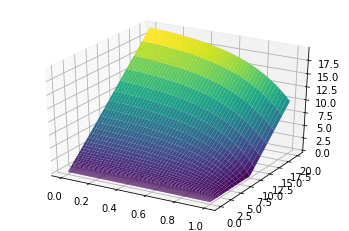

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
from matplotlib import cm 
fig = plt.figure()
ax = fig.gca(projection='3d')
ltm, Ym = np.meshgrid(lt, Y) 
tY = Y.reshape(Y.shape[1],Y.shape[0])
V = V +np.exp(tY)-K*np.exp(-(T-lt)*rho)
ax.plot_surface(ltm,np.exp(Ym), V, cmap=cm.viridis)  
plt.show()      

In [4]:
index = int((M/2)+(M*np.log(s0))/(2*KI)) 
print(index) 
V[index,0]

NameError: name 'M' is not defined

In [10]:
print(Y[0,index])  
print("----------")  
print(np.log(s0))


1.6130866088367646
----------
1.6094379124341003


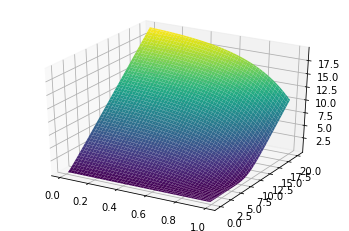

In [431]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
from matplotlib import cm 
N = 100 
fig = plt.figure()
ax = fig.gca(projection='3d')
lt= np.linspace(T/N,T-T/N,N-2)
Yt = np.linspace(np.min(np.exp(Y)),np.max(np.exp(Y)),N)
ltm, Ym = np.meshgrid(lt, Yt)
Vt = [[Fl(t,x,rho,sigma,T,K) for t in lt] for x in Yt] 
Vt = np.array(Vt)
ax.plot_surface(ltm,Ym, Vt, cmap=cm.viridis)   
plt.show() 

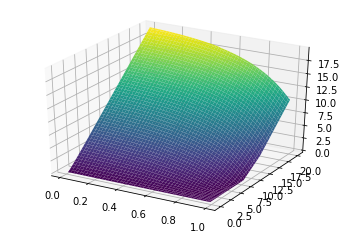

In [467]:
m = 100
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
from matplotlib import cm 
N = 100 
fig = plt.figure()
ax = fig.gca(projection='3d')
lt= np.linspace(T/N,T-T/N,N-2)
Yt = np.linspace(np.min(np.exp(Y)),np.max(np.exp(Y)),N)
ltm, Ym = np.meshgrid(lt, Yt)
Vt = [[Fr(float(t),x,rho,sigma,T,K,m) for t in lt] for x in Yt] 
Vt = np.array(Vt)
ax.plot_surface(ltm,Ym, Vt, cmap=cm.viridis)   
plt.show()    